In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggl|e/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train_sub = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") #초기 data유지용
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test_sub = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv") #초기 data 유지용
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
#시각화를 위한 기본 설정

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

결과값 로그 변환을 하기전에 이상치를 제거할 것이다.
GrLivArea, OverallQual, YearBuilt, overallCond 이상치 관리 들어갈 테니, 하나씩 보자.
이거는 모델까지 돌려보고 나서, 처음으로 돌아와서 하는거니, 순서대로 보고싶으면 아래것부터 보자.

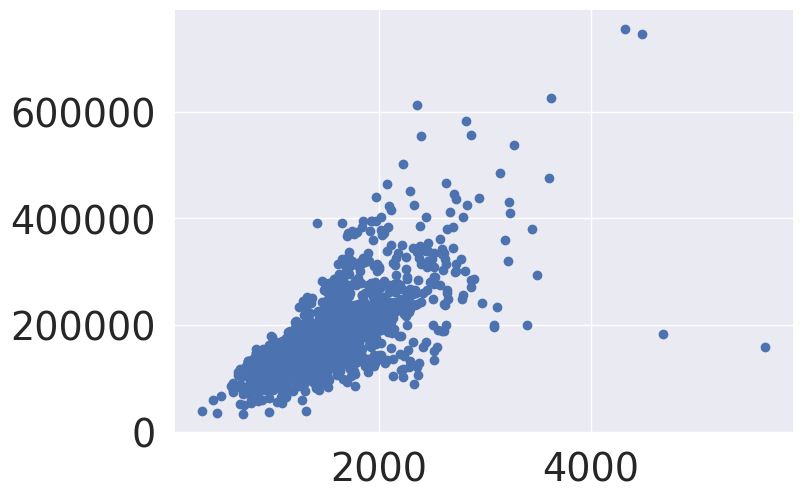

In [4]:
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.show()

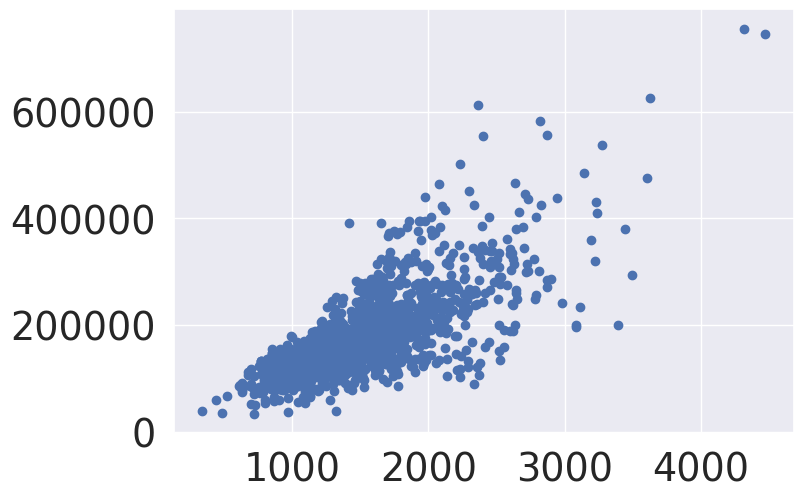

In [5]:
df_train.drop(df_train[(df_train['GrLivArea'] >4000) & (df_train['SalePrice'] < 400000)].index, inplace=True,axis=0)
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.show()
#GrLiv 이상치 2개 제거 완료

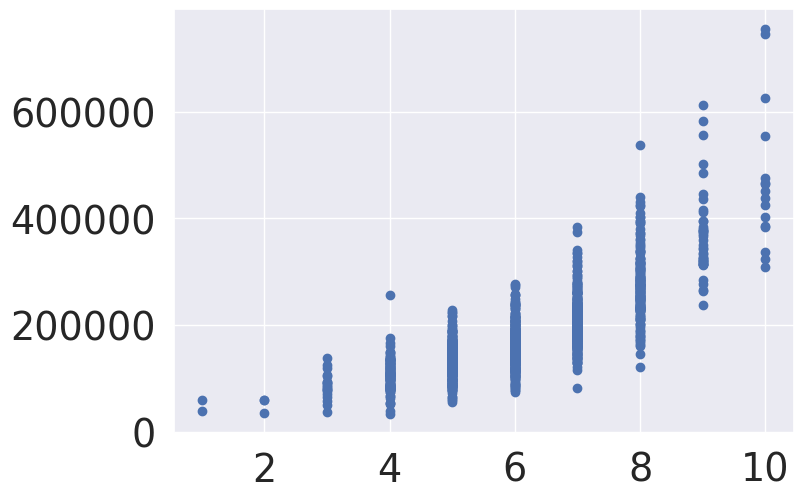

In [6]:
plt.scatter(x=df_train['OverallQual'],y=df_train['SalePrice'])
plt.show()

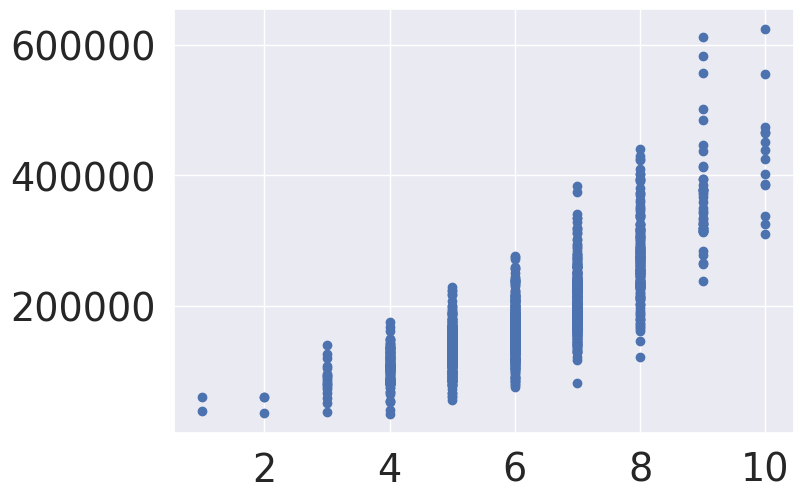

In [7]:
df_train.drop(df_train[(df_train['OverallQual'] ==4) & (df_train['SalePrice'] > 200000)].index, inplace=True,axis=0)
df_train.drop(df_train[(df_train['OverallQual'] ==8) & (df_train['SalePrice'] > 500000)].index, inplace=True,axis=0)
df_train.drop(df_train[(df_train['OverallQual'] ==10) & (df_train['SalePrice'] > 700000)].index, inplace=True,axis=0)
plt.scatter(x=df_train['OverallQual'],y=df_train['SalePrice'])
plt.show()
#overallqual 이상치 5개 제거 완료

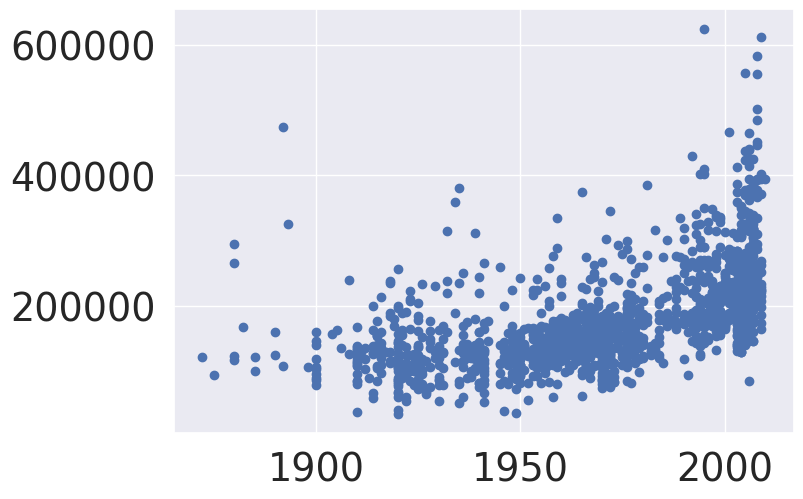

In [8]:
plt.scatter(x=df_train['YearBuilt'],y=df_train['SalePrice'])
plt.show()

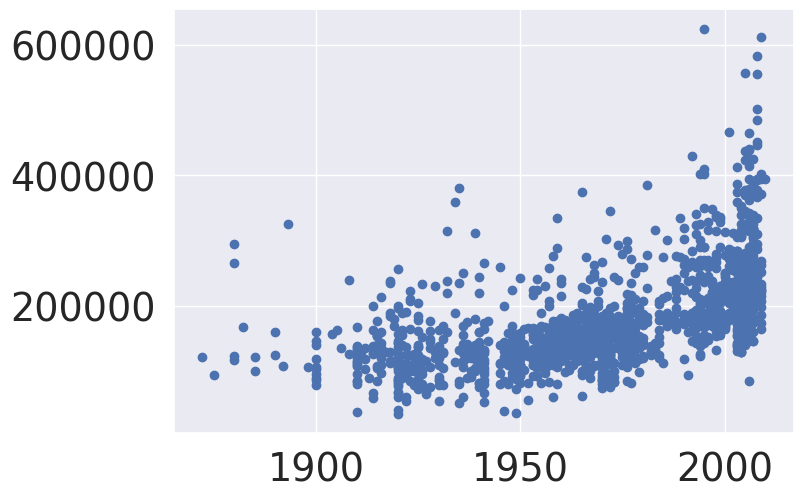

In [9]:
df_train.drop(df_train[(df_train['YearBuilt'] <1900) & (df_train['SalePrice'] > 400000)].index, inplace=True,axis=0)
plt.scatter(x=df_train['YearBuilt'],y=df_train['SalePrice'])
plt.show()
#YearBuilt 이상치 1개 제거 완료

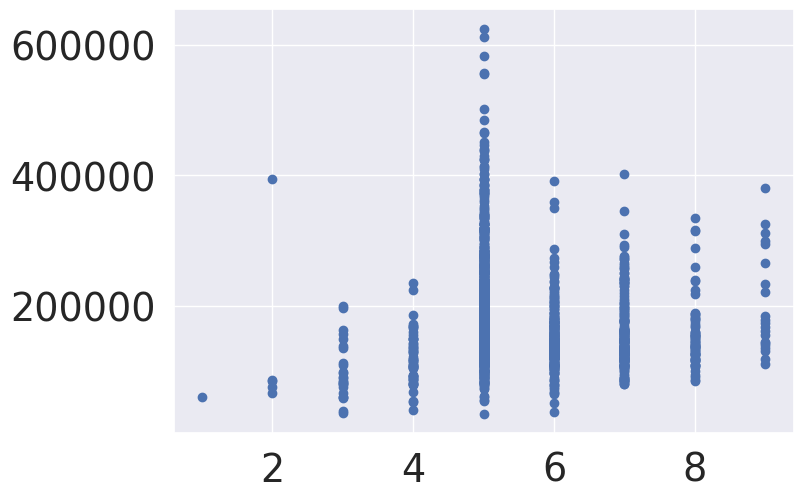

In [10]:
plt.scatter(x=df_train['OverallCond'],y=df_train['SalePrice'])
plt.show()

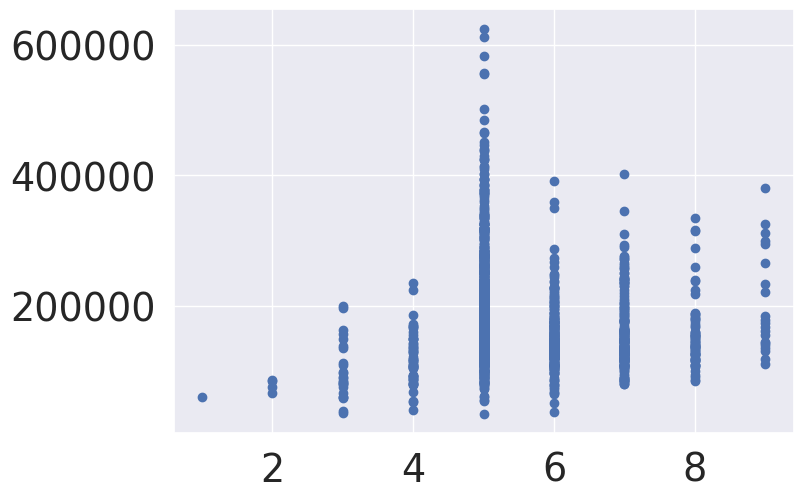

In [11]:
df_train.drop(df_train[(df_train['OverallCond'] <3) & (df_train['SalePrice'] > 200000)].index, inplace=True,axis=0)
plt.scatter(x=df_train['OverallCond'],y=df_train['SalePrice'])
plt.show()
#overallCond 이상치 1개 제거완료

# 우선 회귀의 경우, 결과값의 분포를 확인한다.
# 결과값의 분포가 정규분포가 아닐경우, 정규분포로 바꿔준다. 

1.535256221561691


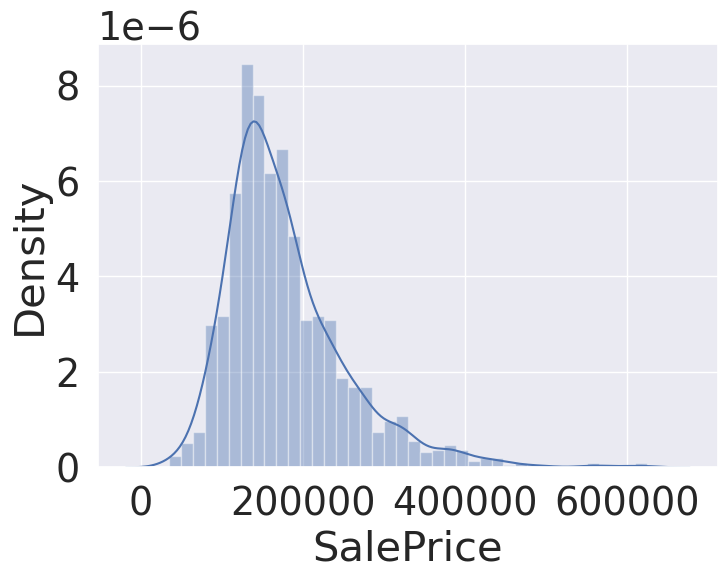

In [12]:
sns.distplot(df_train['SalePrice'])
print(df_train['SalePrice'].skew()) # skew값이 -0.5~0.5 사이가아닐경우, 조정이 반드시 필요하다.

0.04581090445821228


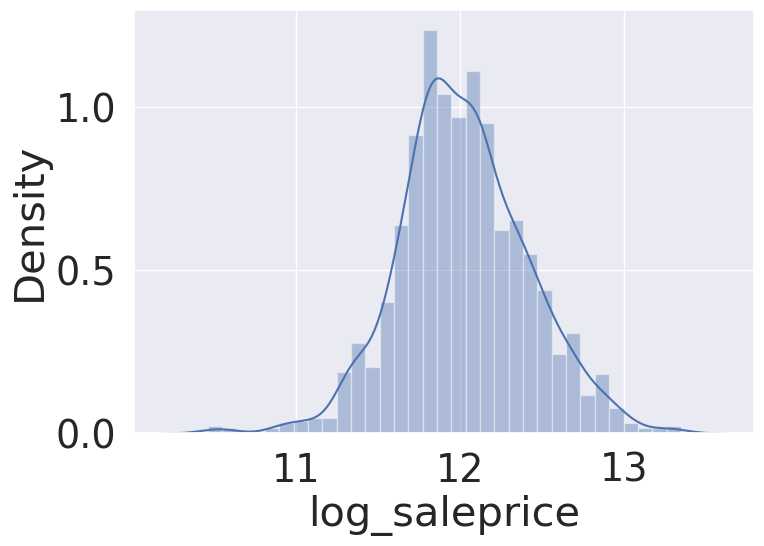

In [13]:
df_train['log_saleprice']=np.log1p(df_train['SalePrice']) # 제일 무난하게 시도가능한 예시가 로그변환이다.
sns.distplot(df_train['log_saleprice'])
print(df_train['log_saleprice'].skew()) # skew값이 -0.5~0.5 사이가아닐경우, 조정이 반드시 필요하다.

log 변환으로 안될경우, 대체할 방법으로 powerTransformer의 box-cox와 yeo-johnson 방법이있다.
두방법은 사실상 같은 방법으로, 로그변환으로 안되지만 정규분포로 만들고 싶을때 요긴하게 사용가능하다.

다시 돌아오는것도 inverse_transform이라는 내장함수로 가능하다.
하지만, pred상에서 쓰기 힘드니 마지막 결과값으로는 가급적 log정도만 사용하자.

-0.002762985925165307


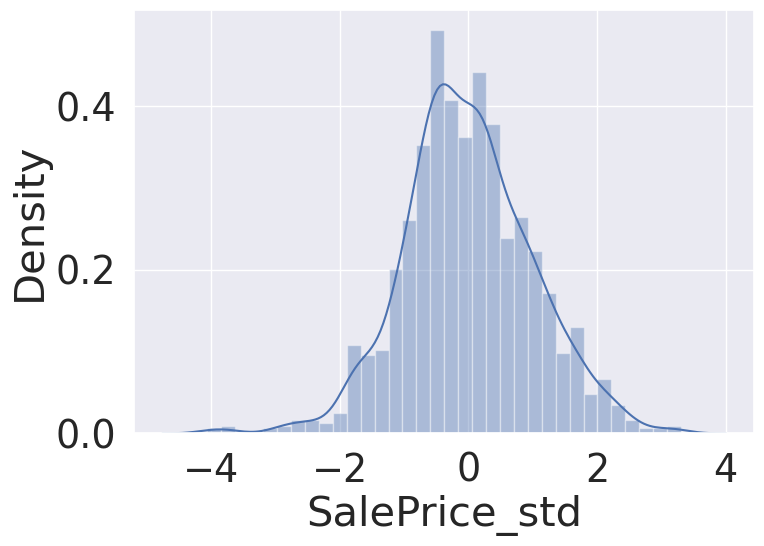

In [14]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
scaler.fit(df_train[['SalePrice']])
df_train['SalePrice_std']=scaler.transform(df_train[['SalePrice']])
sns.distplot(df_train['SalePrice_std'])
print(df_train['SalePrice_std'].skew()) # skew값이 -0.5~0.5 사이가아닐경우, 조정이 반드시 필요하다.


-0.0027635806306513474


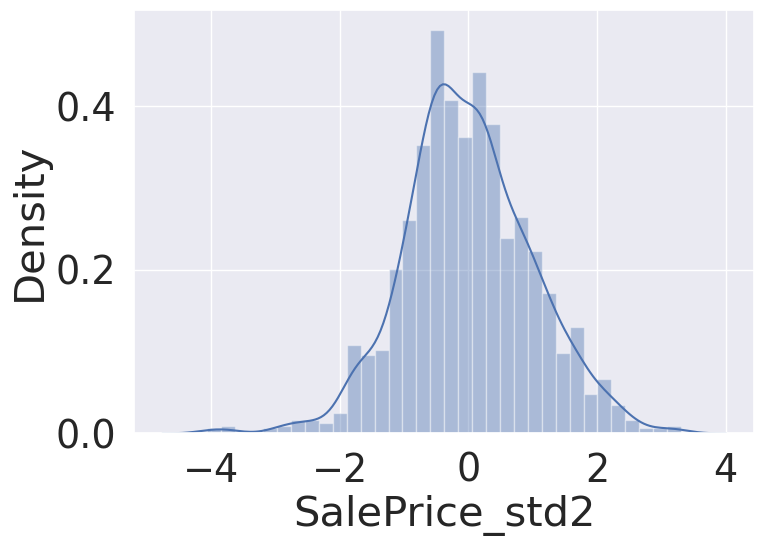

In [15]:

scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(df_train[['SalePrice']])
df_train['SalePrice_std2']=scaler.transform(df_train[['SalePrice']])
sns.distplot(df_train['SalePrice_std2'])
print(df_train['SalePrice_std2'].skew()) # skew값이 -0.5~0.5 사이가아닐경우, 조정이 반드시 필요하다.

1.5352617821293946


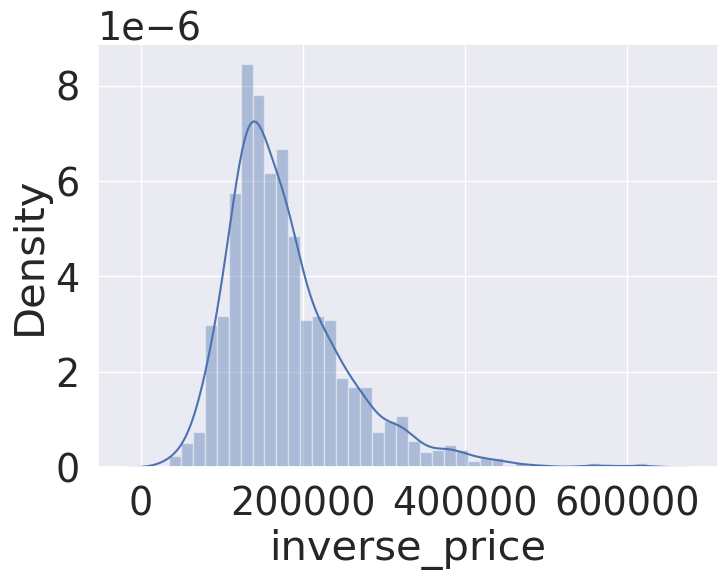

In [16]:
df_train['inverse_price']=scaler.inverse_transform(df_train[['SalePrice_std']])
sns.distplot(df_train['inverse_price'])
print(df_train['inverse_price'].skew()) #powertransform은 이런식으로 다시 원상태로 복귀가 가능하다. 

In [17]:
df_train.drop(['SalePrice','SalePrice_std','SalePrice_std2','inverse_price'], axis=1 , inplace=True)
#우리는 SalePrice_std2 만 사용할 것으로, 나머지를 삭제한다.

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotFrontage    1194 non-null   float64
 4   LotArea        1452 non-null   int64  
 5   Street         1452 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1452 non-null   object 
 8   LandContour    1452 non-null   object 
 9   Utilities      1452 non-null   object 
 10  LotConfig      1452 non-null   object 
 11  LandSlope      1452 non-null   object 
 12  Neighborhood   1452 non-null   object 
 13  Condition1     1452 non-null   object 
 14  Condition2     1452 non-null   object 
 15  BldgType       1452 non-null   object 
 16  HouseStyle     1452 non-null   object 
 17  OverallQual    1452 non-null   int64  
 18  OverallC

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [20]:
df_train.isnull().sum()[df_train.isnull().sum()>0] #널값이 존재하는 모든 데이터를 받아온다.

LotFrontage      258
Alley           1361
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1447
Fence           1173
MiscFeature     1398
dtype: int64

In [21]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

결측값 처리는 여러가지가 있지만, 다른 데이터와의 관계고려해서 넣기, 평균으로 넣기, 해당 데이터 제거하기, 해당 feature 제거하기, 빈도수 높은걸로 처리 등이 있다.

In [22]:
df_train.drop(['Id','PoolQC','Alley','Fence','FireplaceQu'], axis=1 , inplace=True)
df_test.drop(['Id','PoolQC','Alley','Fence','FireplaceQu'], axis=1 , inplace=True)
# 비교적 없는값이 많은놈들중, 숫자형 data 4개와 label인 Id를 삭제한다. MiscFeature는 문자열이라 살아남았다. 

In [23]:
df_train.fillna(df_train.mean(), inplace = True)
df_test.fillna(df_train.mean(), inplace = True) 
#숫자형 data들을 평균으로 처리해주지만, 사실 별로 맘에 안든다. 이문제에는 없지만 숫자형이지만 평균으로 처리하면 안되는 놈들이 있다.
#0 과 1 만 들어있는것도 숫자형으로 들어가니, 이런게 있는 data의 경우 평균넣기전 따로 채워줘야한다.(보통 mode() 최빈값 처리한다)

이제 문자형 data들 싹다 one-hot encoding 조져준다.

In [24]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)
#문자형 data의 NULL값을 완전히 없애주고, one hot encoding을 해준다.

In [25]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 274 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(33), uint8(237)
memory usage: 767.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 257 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(221)
memory usage: 725.4 KB


특이하게 df_train은 275개, df_test는 257개의 column이 나왔다. 
이러한 이유는 get_dummies특성상 test에 없는 계열이 train에, train에 없는 계열이 test에 있을 수 있기 때문에 발생하는 거지같은 case이다.
해결책은 서로 없는것만 없어지는 구조이기 때문에, 서로가 서로에게 없는거는 0을 넣어버리라고 명령하면 된다.

물론 이러면 둘다에게 SalePrice_std2가 있기 때문에, 제거할때 둘다 제거해줘야한다. 
그러고 나서 서로 정렬한번 조져주자. (순서로 파악하기 때문에 그대로 돌리면 터진다.)

In [26]:
train_plus=[]
test_plus=[]
train_columns=df_train.columns.tolist()
test_columns=df_test.columns.tolist()

for i in train_columns:
    if i not in test_columns:
        test_plus.append(i)

for i in test_columns:
    if i not in train_columns:
        train_plus.append(i)
        
df_train[train_plus]=0
df_test[test_plus]=0

df_train = df_train.sort_index(axis=1)
df_test = df_test.sort_index(axis=1)

여기서 이제 중요한 10가지 특성을 확인할 것이다 - 사실 별 의미는 없지만, 확인하기에는 유용하다.

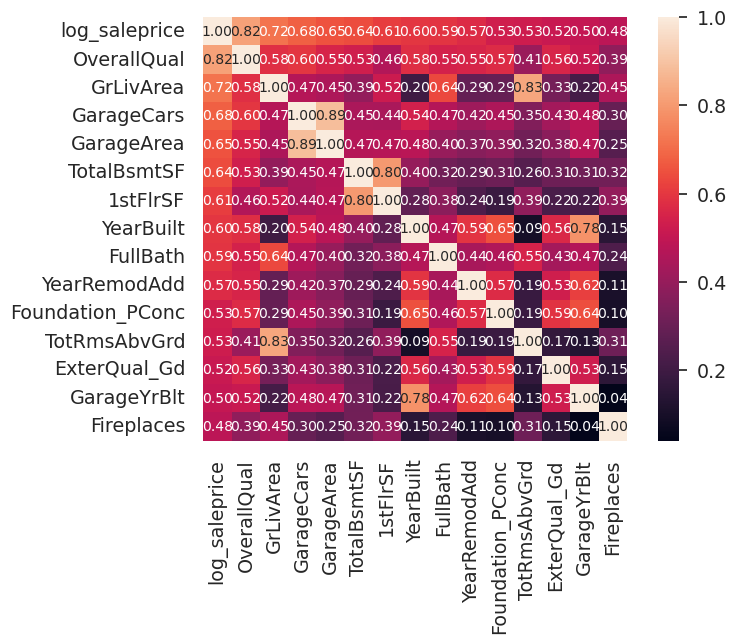

In [27]:
k = 15 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'log_saleprice')['log_saleprice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

여기서 이제 모든 숫자형 data들에 대해서 powertransformer와 standardscaler를 해줄거다. 방법은 다음과 같다.

In [28]:
features =  df_train_sub.select_dtypes(exclude='object')
features.drop(['Id','SalePrice'], axis=1 , inplace=True) # poolqc, alley, fence, fireplacequ는 문자열이었음.
features = features.columns.tolist()

for i in features:
    feature_scaler = PowerTransformer(method='yeo-johnson')
    feature_scaler.fit(df_train[[i]])
    df_train[i]=feature_scaler.transform(df_train[[i]])
    df_test[i]=feature_scaler.transform(df_test[[i]])

#모든 수치형에 대해서 powertransformer가 완료되었다. train기준으로 해주는게 중요하다.

In [29]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(df_train[features])
df_train[features] = std_scaler.transform(df_train[features])
df_test[features] = std_scaler.transform(df_test[features])

#모든 수치형에 대해서 standardscaler도 완료되었다. 역시 train 기준으로 해야한다. 

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import numpy as np 
# 일단 seed 값을 지정하고, 
np.random.seed(seed=0) 
# np.random에 있는 함수에 직접 접근 하여 random number를 생성. 
y = df_train['log_saleprice']
df_train.drop(['log_saleprice'], axis=1 , inplace=True)
df_test.drop(['log_saleprice'], axis=1 , inplace=True)
train_input, val_input, train_target, val_target = train_test_split(df_train,y,test_size=0.2, random_state=2321)

이제 여러가지 모델들로 grid_search를 해보겠다.

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

line_model = LinearRegression()
line_model.fit(train_input, train_target)
pred = line_model.predict(train_input)
mse_train = mean_squared_error(train_target,pred)
print(mse_train)
pred = line_model.predict(val_input)
mse_val = mean_squared_error(val_target,pred)

print(mse_val)
#압도적인 과적합 feature 너무 많음

0.008182671587726698
7.853196784891799e+18


In [32]:
from sklearn.model_selection import GridSearchCV
ridge_model_ori=Ridge()
param_grid={'alpha' : range(1,10,1)
           }
ridge_model=GridSearchCV(ridge_model_ori, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
ridge_model.fit(train_input, train_target)
print('final params', ridge_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', -ridge_model.best_score_)      # 최고의 점수

ridge_pred_train = ridge_model.predict(train_input)
mse_train = mean_squared_error(train_target,ridge_pred_train)
print(mse_train)
ridge_pred_val = ridge_model.predict(val_input)
mse_val = mean_squared_error(val_target,ridge_pred_val)
print(mse_val)
#그나마 괜찮은 듯한 모델(log된 모델이지만 어짜피 평가도 log에서 RMSE하라고 적혀있었음. 루트야 그냥 알수있으니 넘어간다.)

final params {'alpha': 9}
best score 0.11583994989926676
0.00923451061885701
0.012292288844318796


In [33]:
lasso_model_ori=Lasso()
param_grid={'alpha' : [0.0001, 0.0005, 0.001]
           }
lasso_model=GridSearchCV(lasso_model_ori, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lasso_model.fit(train_input, train_target)
print('final params', lasso_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', -lasso_model.best_score_)      # 최고의 점수

lasso_pred_train = lasso_model.predict(train_input)
mse_train = mean_squared_error(train_target,lasso_pred_train)
print(mse_train)
lasso_pred_val = lasso_model.predict(val_input)
mse_val = mean_squared_error(val_target,lasso_pred_val)
print(mse_val)
#그나마 괜찮은 듯한 모델(log된 모델이지만 어짜피 평가도 log에서 RMSE하라고 적혀있었음. 루트야 그냥 알수있으니 넘어간다.)

final params {'alpha': 0.0005}
best score 0.11316569152712663
0.009892145812687771
0.011740743540525053


In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_model_ori = RandomForestRegressor(criterion= 'squared_error')
param_grid={'max_depth' : range(70,90,5),
            'min_samples_leaf' : [2,3]
           }
forest_model=GridSearchCV(forest_model_ori, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

forest_model.fit(train_input, train_target)
print('final params', forest_model.best_params_)   # 최적의 파라미터 값 출력
print('best score', -forest_model.best_score_)      # 최고의 점수

forest_pred_train = forest_model.predict(train_input)
mse_train = mean_squared_error(train_target,forest_pred_train)
print(mse_train)
forest_pred_val = forest_model.predict(val_input)
mse_val = mean_squared_error(val_target,forest_pred_val)
print(mse_val)

final params {'max_depth': 80, 'min_samples_leaf': 2}
best score 0.13759624614547
0.0038427600387856416
0.021840603472653913


In [35]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(max_depth=3,gamma=0.01,eta=0.1)
xgb_model.fit(train_input, train_target)
xgb_pred_train = xgb_model.predict(train_input)
mse_train = mean_squared_error(train_target,xgb_pred_train)
print(mse_train)
xgb_pred_val = xgb_model.predict(val_input)
mse_val = mean_squared_error(val_target,xgb_pred_val)
print(mse_val)

0.006877772086439042
0.01597348551467296


In [36]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(train_input, train_target)
lgbm_pred_train = lgbm_model.predict(train_input)
mse_train = mean_squared_error(train_target,lgbm_pred_train)
print(mse_train)
lgbm_pred_val = lgbm_model.predict(val_input)
mse_val = mean_squared_error(val_target,lgbm_pred_val)
print(mse_val)

0.001437530703430354
0.018282945152479448


In [37]:

stacking_data_train = np.array([ridge_pred_train, lasso_pred_train,forest_pred_train,xgb_pred_train,lgbm_pred_train])
stacking_data_train = np.transpose(stacking_data_train)
stacking_data_val = np.array([ridge_pred_val, lasso_pred_val ,forest_pred_val ,xgb_pred_val ,lgbm_pred_val])
stacking_data_val = np.transpose(stacking_data_val)
#이렇게 데이터는 만들었고 이 스태킹을 뭘로 할지도 또 고민해야됨.

In [38]:
lgbm_model_st = LGBMRegressor()
lgbm_model_st.fit(stacking_data_train, train_target)
lgbm_pred_train_st = lgbm_model_st.predict(stacking_data_train)
mse_train = mean_squared_error(train_target,lgbm_pred_train_st)
print(mse_train)
lgbm_pred_val_st = lgbm_model_st.predict(stacking_data_val)
mse_val = mean_squared_error(val_target,lgbm_pred_val_st)
print(mse_val)

0.0013213380669268577
0.01906070219864859


선형의 경우 아래와 같이 중요 지표를 시각화 할 수 도 있다.

<AxesSubplot:>

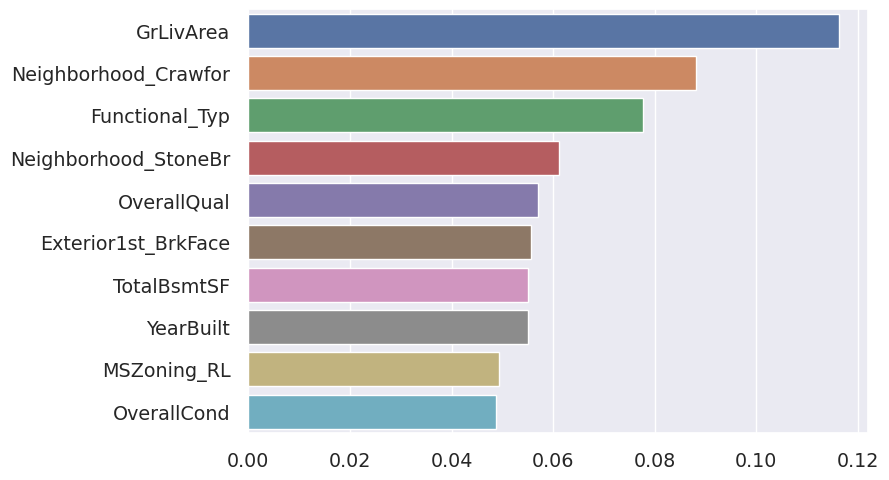

In [39]:
coef = pd.Series(ridge_model.best_estimator_.coef_, index=train_input.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values[0:10], y=coef_sort.index[0:10])
#다음과 같은 방식으로 중요한 지표를 시각화 할 수 있다.

<AxesSubplot:>

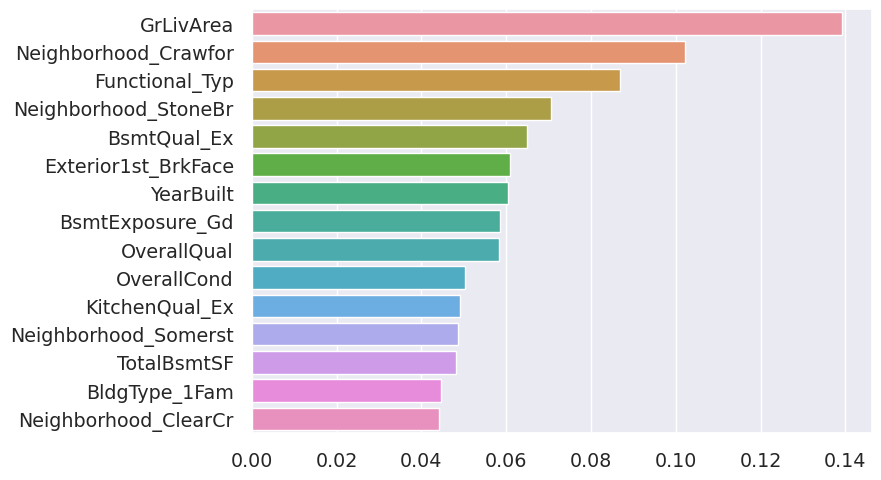

In [40]:
coef = pd.Series(lasso_model.best_estimator_.coef_, index=train_input.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values[0:15], y=coef_sort.index[0:15])
#다음과 같은 방식으로 중요한 지표를 시각화 할 수 있다.

random forest에는 coef가 없다.(방식이 다르잖음)

이런식으로 시각화 한 자료를 통하여, GrLivArea, OverallQual, YearBuilt, overallCond는 좀 중요해 보인다는것을 깨달을 수 있다.
그래서 이 데이터들에 대한 이상치 처리를 다시 앞에서 진행할 것이다.

제출할때 stacking된거를 제출하려면 모든 모델에 다 돌린다음에, stacking을 해서 결과를 받아와야 되므로, 일단 오늘은 xgboost로 마무리하자.

In [41]:
predictions = xgb_model.predict(df_test)
predictions = np.expm1(predictions)
output = pd.DataFrame({'Id': df_test_sub.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
